In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# EDA


## EDA Checklist:

* 1.Understanding the dataset, and its shape
* 2.Checking the data type, and its shape
* 3.Categorical & Numerical Columns
* 4.Checking for missing values
* 5.Descriptive summary of the dataset
* 6.Groupby for classification problems

## DATA

In [9]:
breast_cancer_dataset = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")

In [10]:
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Target column is **diagnosis** and can take two values:
* **M : Malignant**
* **B : Bening**

In [11]:
breast_cancer_dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [12]:
breast_cancer_dataset.shape

(569, 33)

In [13]:
# Checking the data type
breast_cancer_dataset.info()


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 569 entries, 0 to 568

Data columns (total 33 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   id                       569 non-null    int64  

 1   diagnosis                569 non-null    object 

 2   radius_mean              569 non-null    float64

 3   texture_mean             569 non-null    float64

 4   perimeter_mean           569 non-null    float64

 5   area_mean                569 non-null    float64

 6   smoothness_mean          569 non-null    float64

 7   compactness_mean         569 non-null    float64

 8   concavity_mean           569 non-null    float64

 9   concave points_mean      569 non-null    float64

 10  symmetry_mean            569 non-null    float64

 11  fractal_dimension_mean   569 non-null    float64

 12  radius_se                569 non-null    float64

 13  texture_se               569 non-null    float64

 14  perimet

In [14]:
# checking for missing values
breast_cancer_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
# Unnamed: 32 column have 569  null value. We will drop this column
breast_cancer_dataset.drop(columns="Unnamed: 32",axis=1, inplace=True)

In [16]:
# checking for missing values
breast_cancer_dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing value in our dataset

In [17]:
breast_cancer_dataset["diagnosis"].unique()

array(['M', 'B'], dtype=object)

diagnosis column is object (M,B), we should  change this to numerical value

In [18]:
len(breast_cancer_dataset["id"].unique())

569

**id** column change in every data point so this will not helping us in the model. We can drop this column from the dataset.

In [19]:
breast_cancer_dataset.drop(columns="id", axis=1, inplace=True )

In [20]:
breast_cancer_dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Statistical summary of the data**

In [22]:
breast_cancer_dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Describe show the numerical columns info because of that we can't see **diagnosis** column in above

In [23]:
# Checking the distribution of the target Variable
breast_cancer_dataset["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

As a mention before **diagnosis** column is categorical and take M or B value. We should convert (M, B) to numerical values(0, 1)

In [24]:
label_encode = LabelEncoder()

labels = label_encode.fit_transform(breast_cancer_dataset["diagnosis"])

breast_cancer_dataset["target"] =labels

breast_cancer_dataset.drop(columns="diagnosis", axis=1, inplace=True)

In [25]:
breast_cancer_dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [26]:
# Checking the distribution of the target Variable
breast_cancer_dataset["target"].value_counts()

0    357
1    212
Name: target, dtype: int64

**MALIGNANT ---> 1**

**BENIGN ---> 0**

Groupby the data based on the target

In [27]:
breast_cancer_dataset.groupby("target").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Data Visualization

In [28]:
# Checking the distribution of the target Variable
breast_cancer_dataset["target"].value_counts()

0    357
1    212
Name: target, dtype: int64

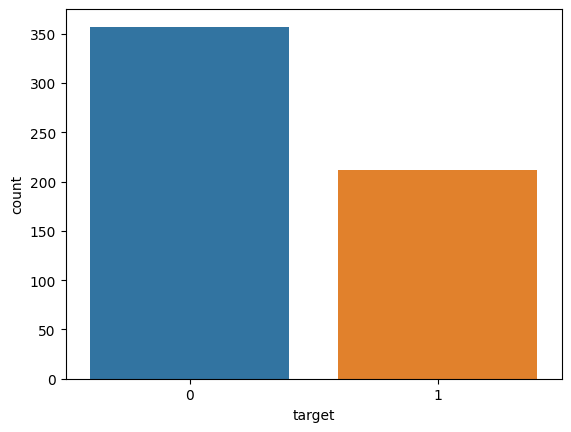

In [29]:
sns.countplot(x="target", data = breast_cancer_dataset);

Distribution plot for all columns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

  fig = plt.figure(figsize=figsize)


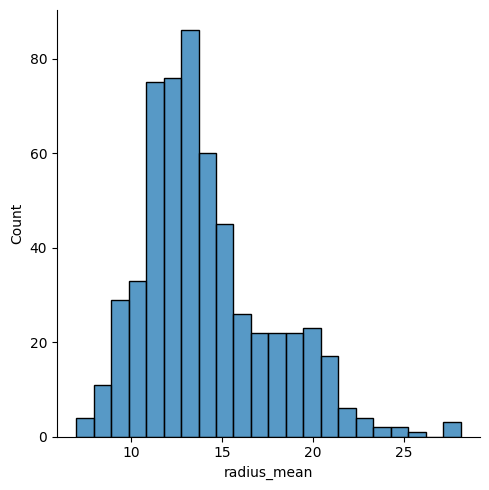

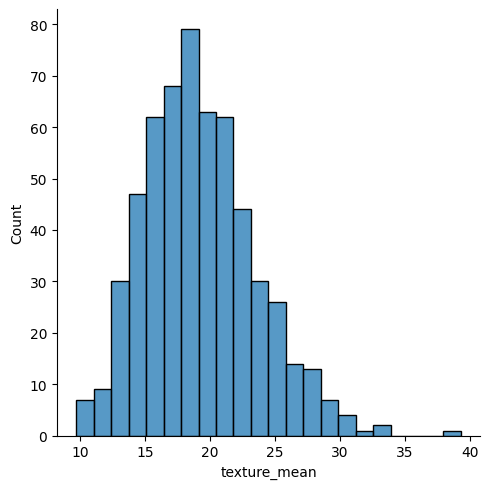

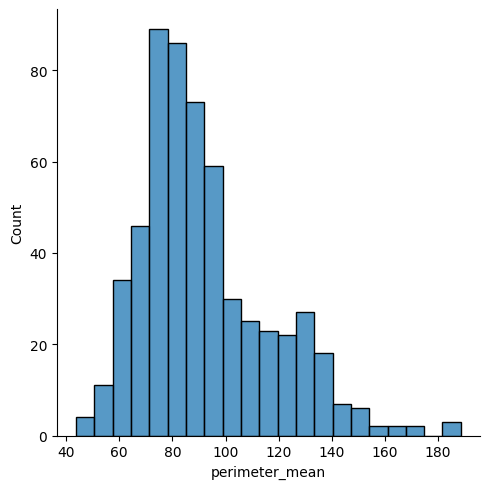

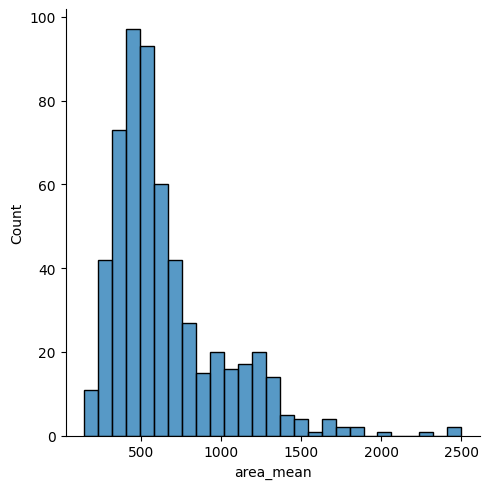

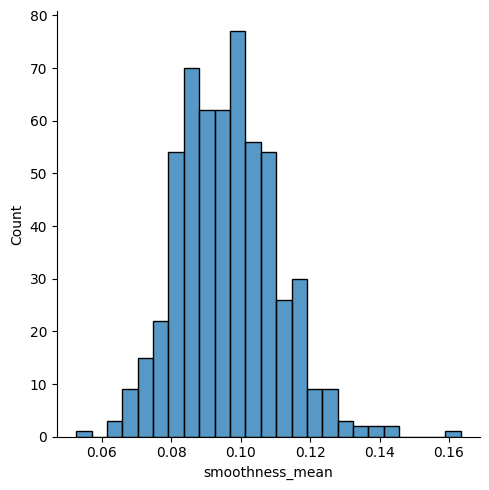

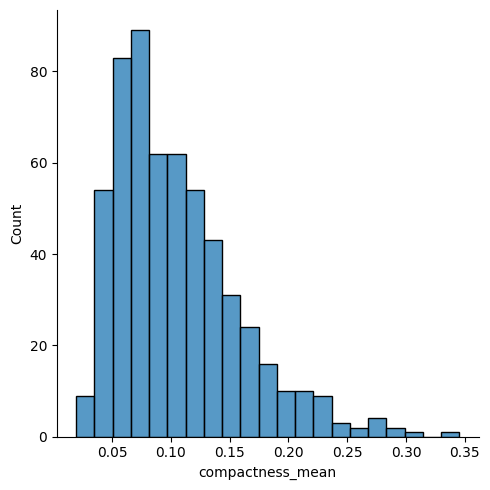

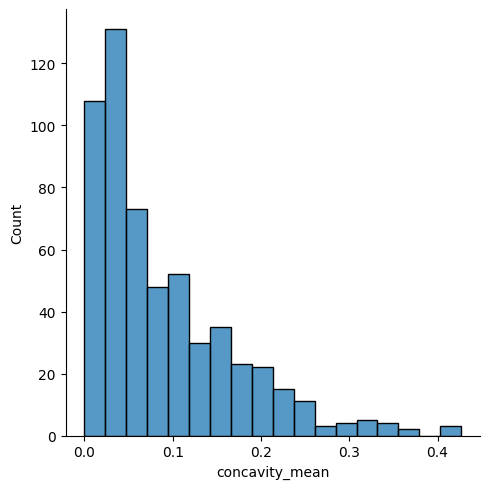

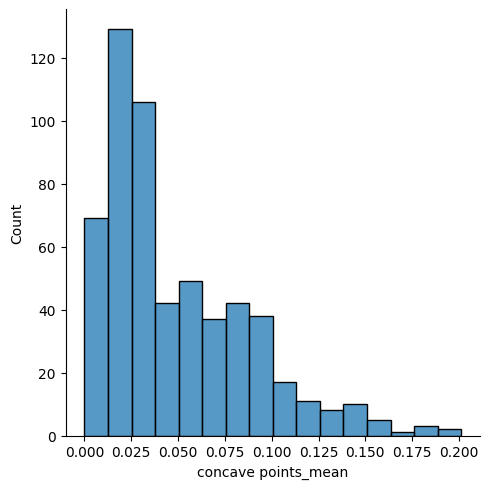

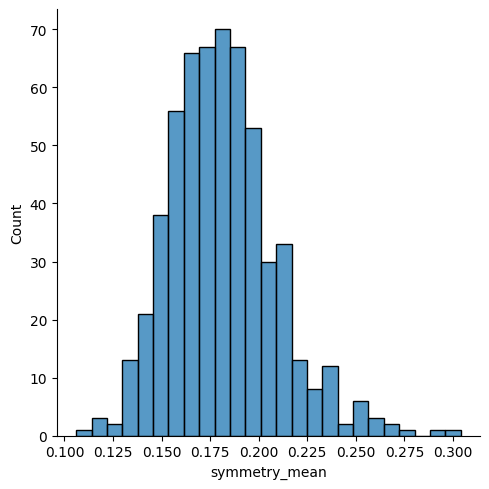

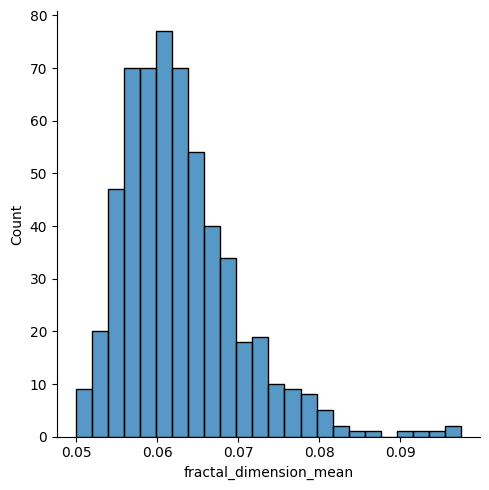

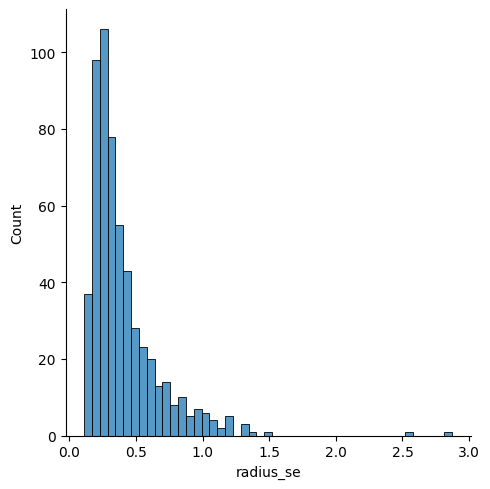

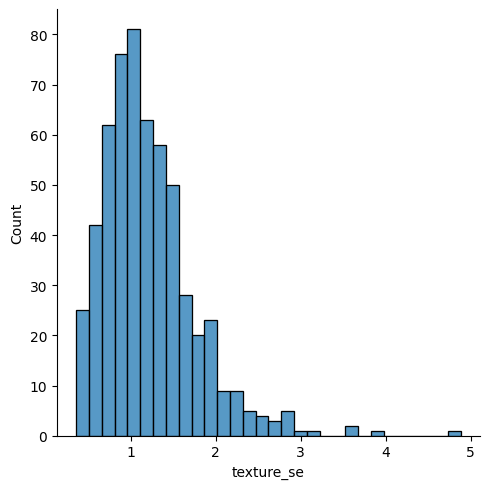

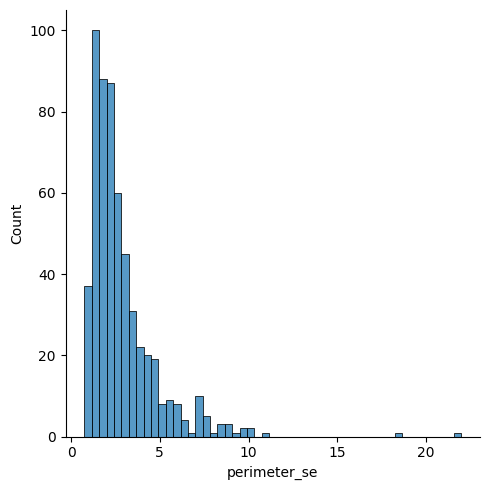

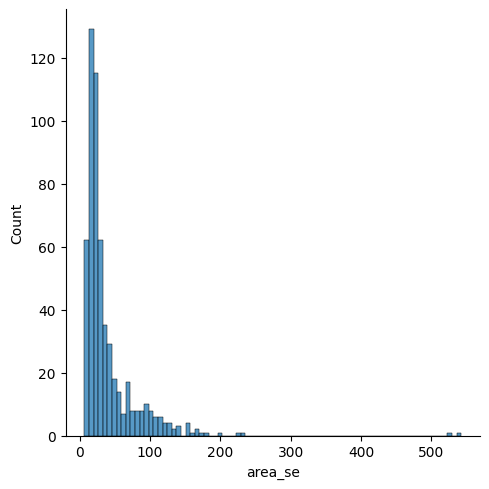

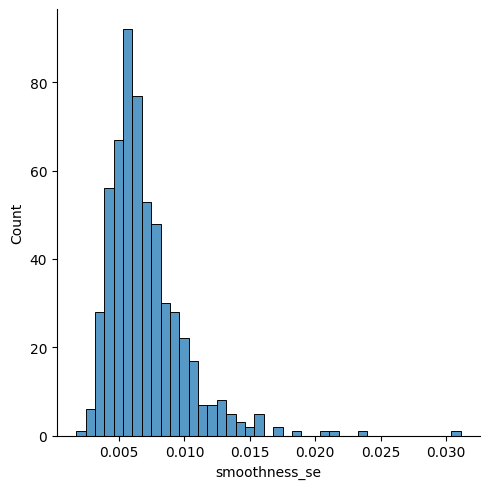

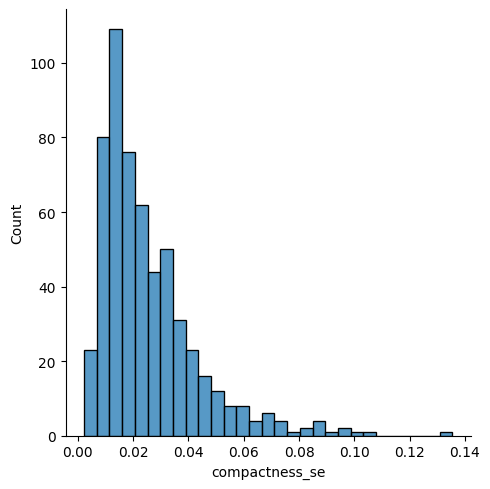

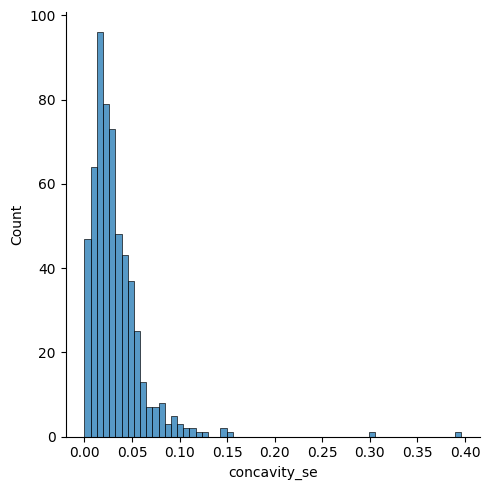

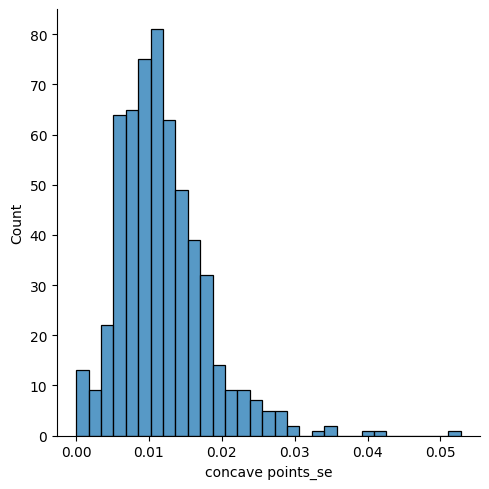

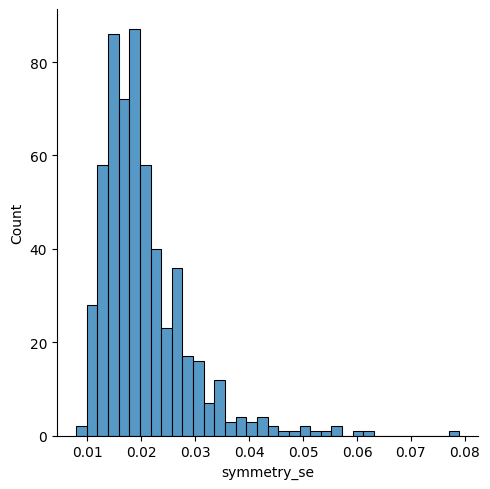

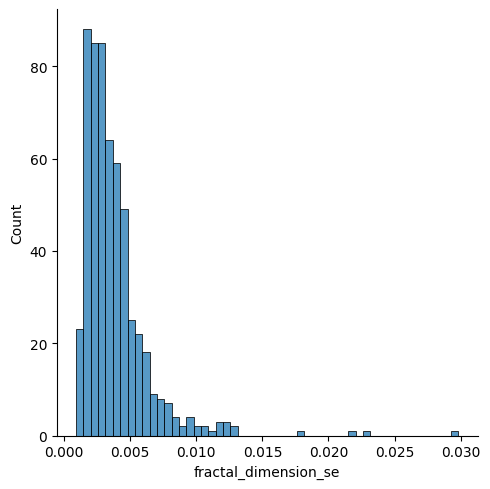

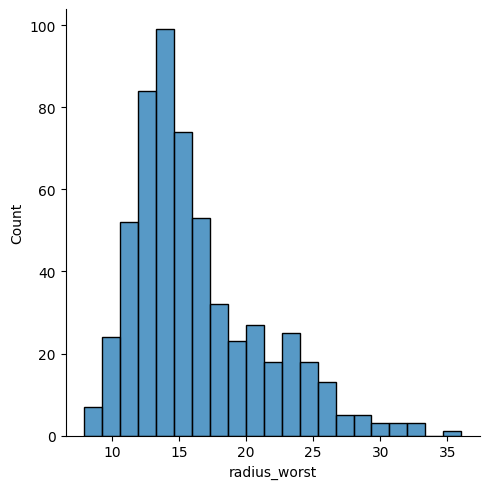

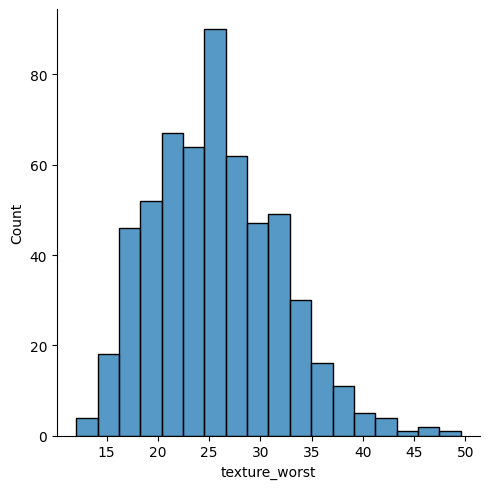

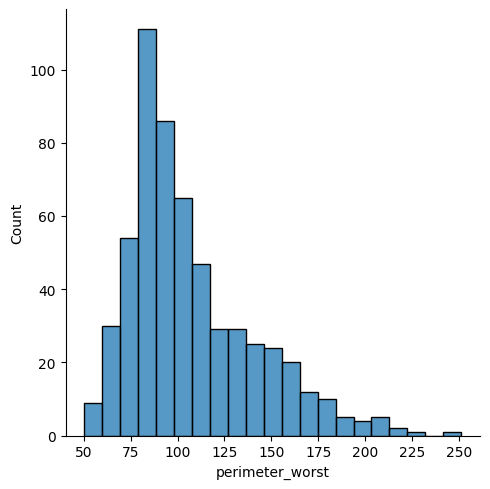

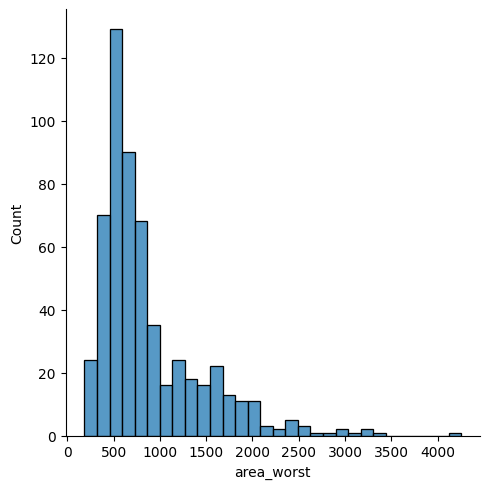

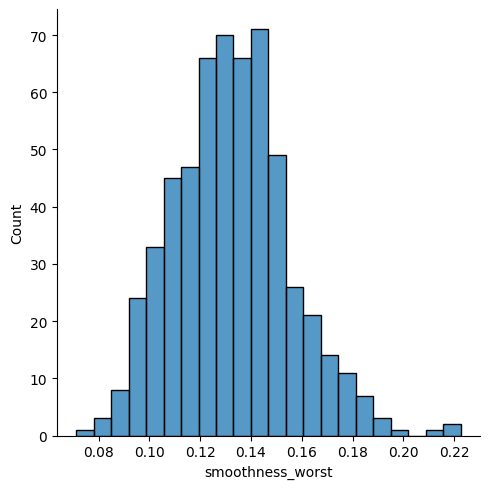

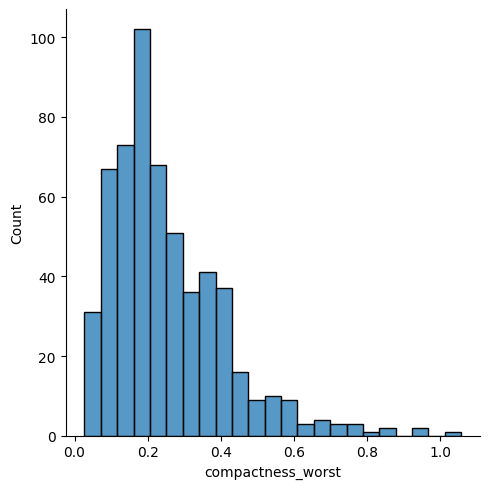

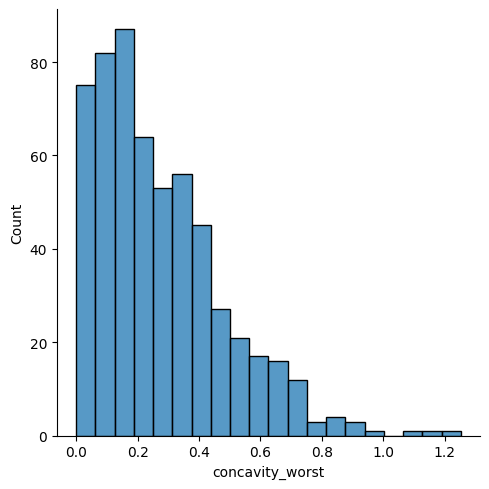

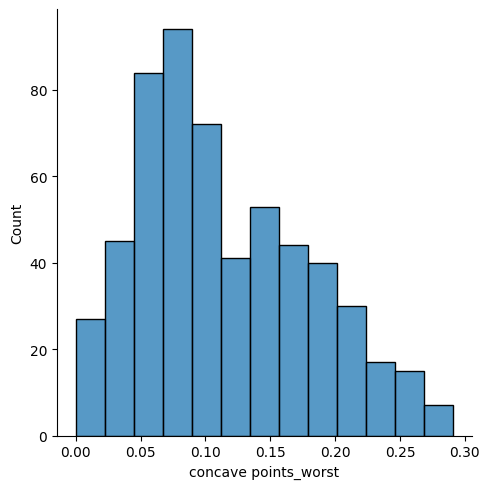

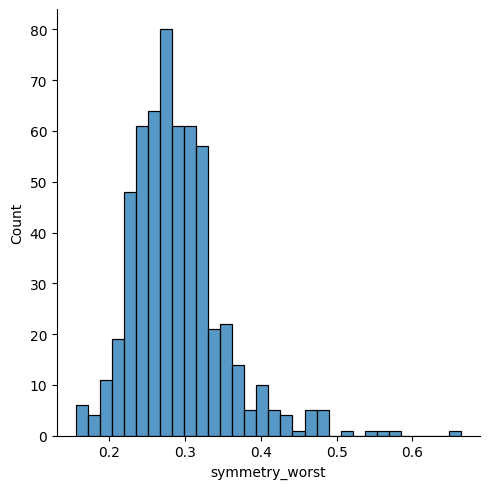

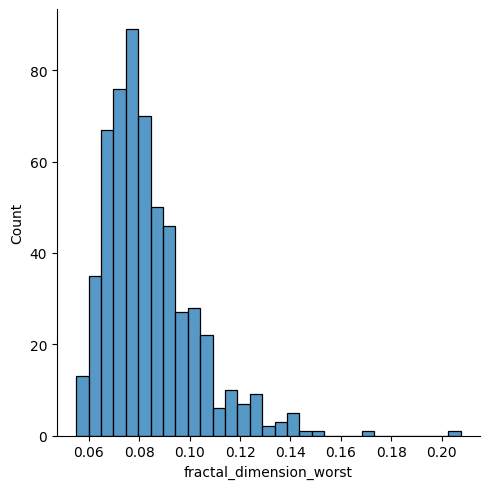

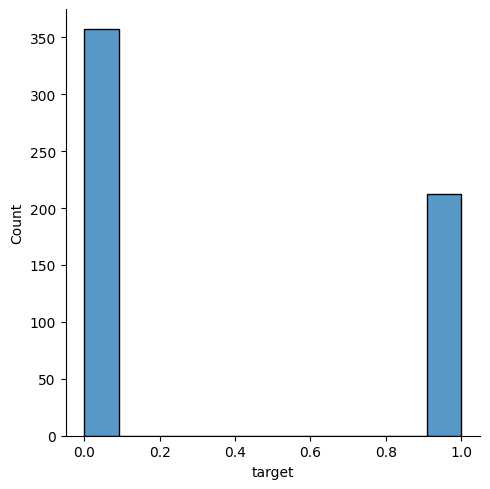

In [30]:
for column in breast_cancer_dataset:
    sns.displot(data=breast_cancer_dataset, x=column);

<ipython-input-31-1a7682feb9be>:1: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(x=breast_cancer_dataset.radius_mean)


<Axes: ylabel='Density'>

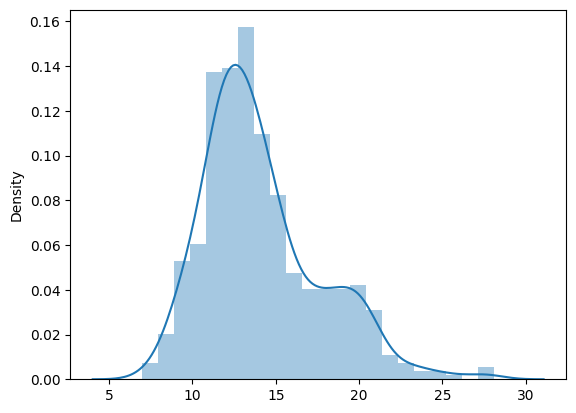

In [31]:
sns.distplot(x=breast_cancer_dataset.radius_mean)

## Corelation Matrix

In [32]:
correlation_matrix= breast_cancer_dataset.corr()

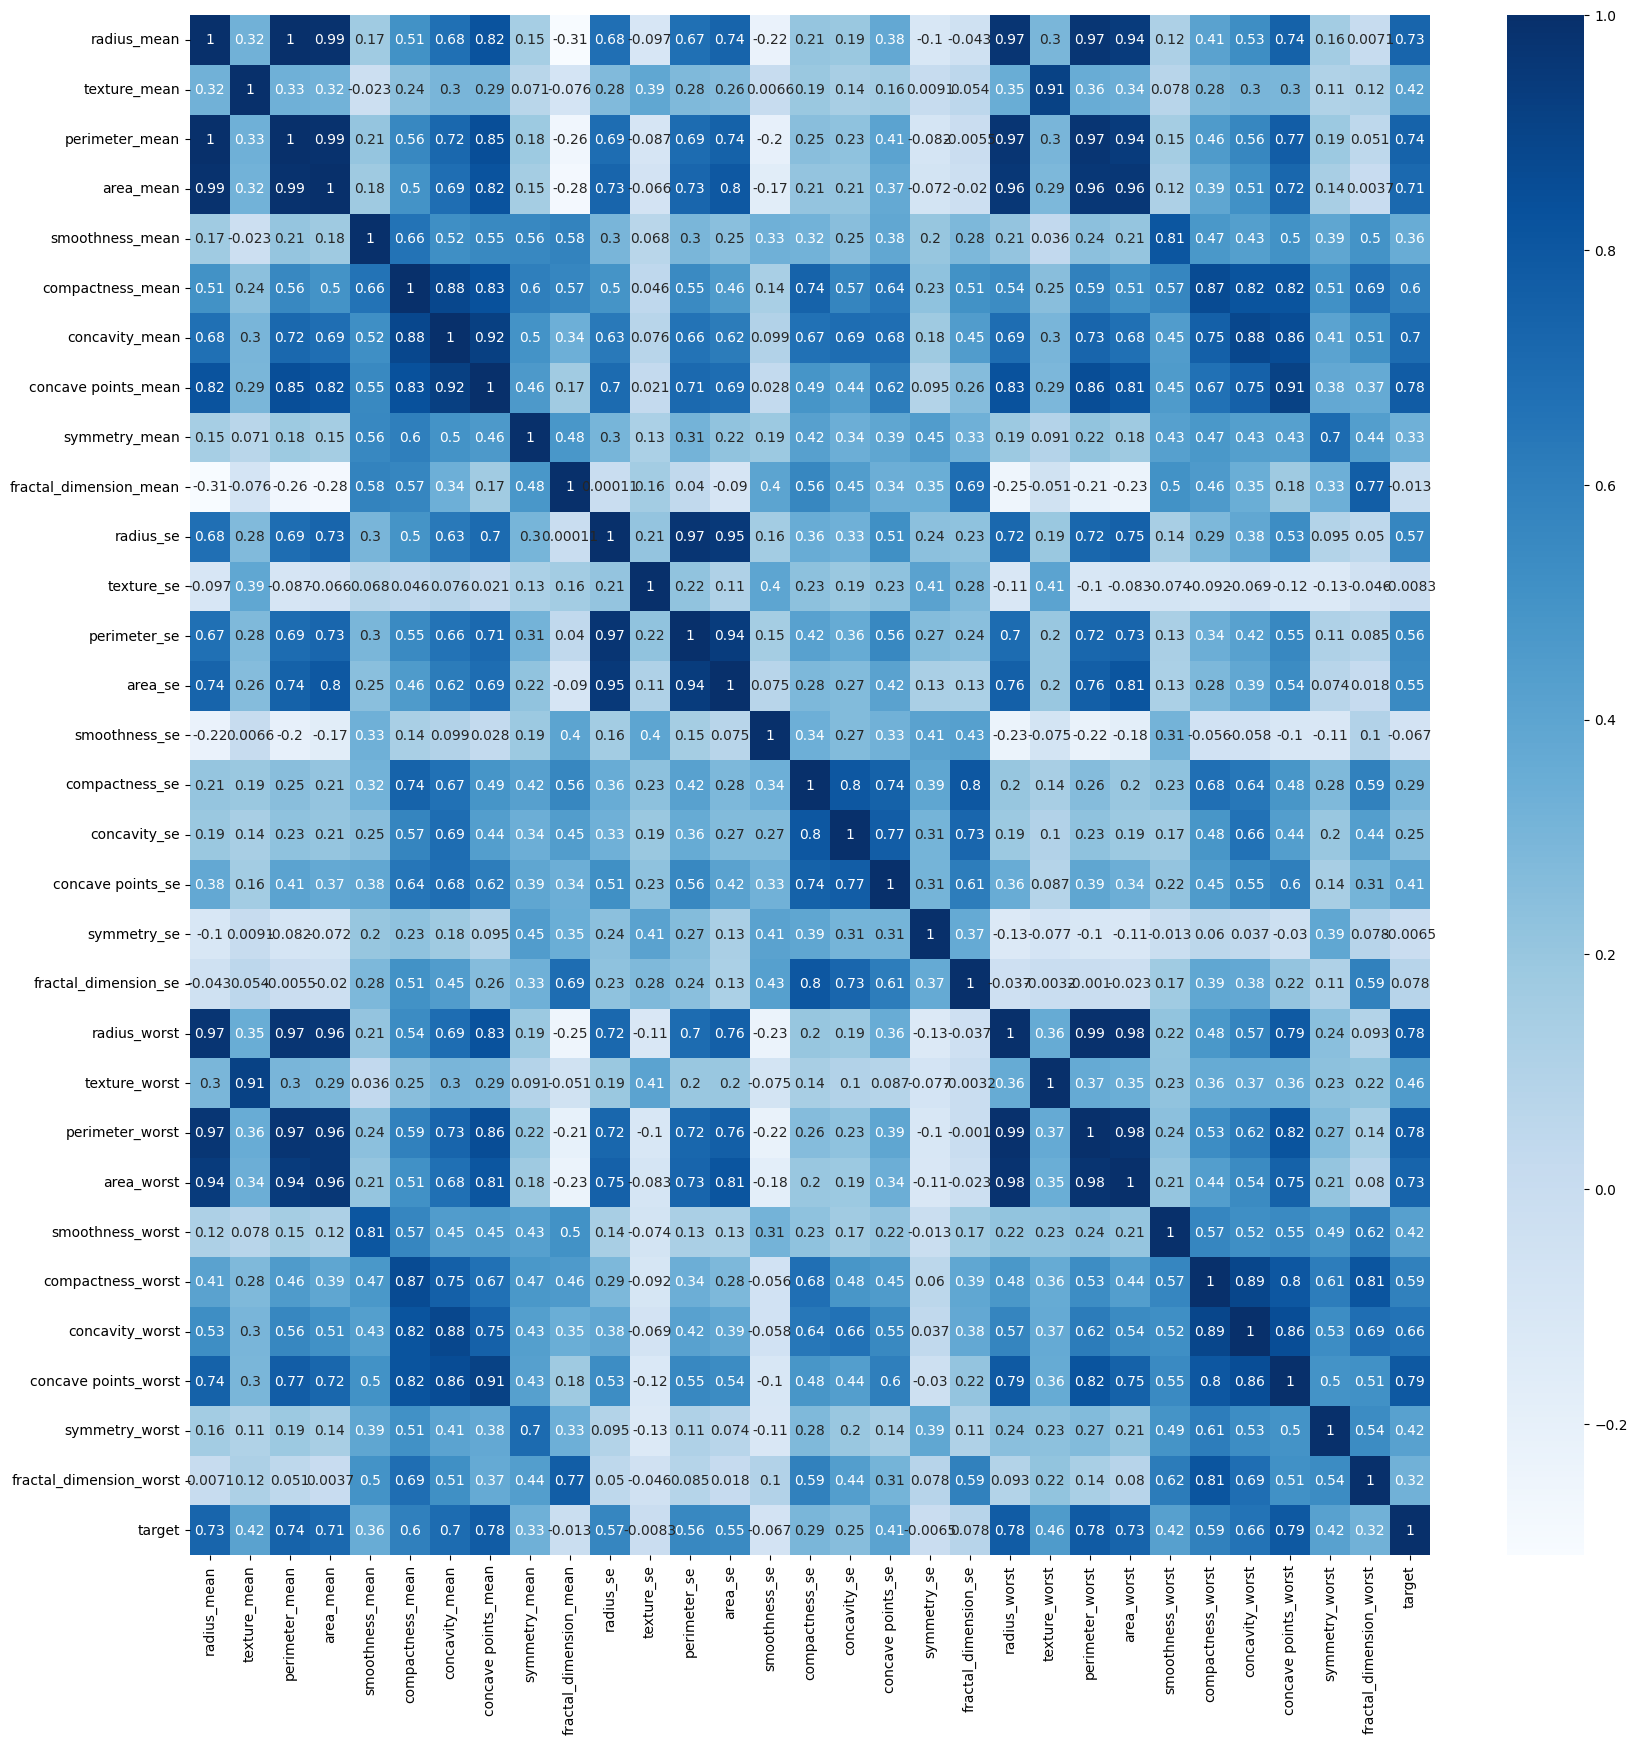

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap="Blues")
plt.savefig("Correlation Heat Map")

## Preparing the data for models

In [34]:
breast_cancer_dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [35]:
X = breast_cancer_dataset.drop(columns ="target", axis=1)
y = breast_cancer_dataset["target"]

In [36]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [38]:
X.shape, y.shape

((569, 30), (569,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
X_train.shape ,y_train.shape

((455, 30), (455,))

In [41]:
X_test.shape, y_test.shape

((114, 30), (114,))

## Normalizing the data

In [43]:
scaler= StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Modeling

## Model1

In [100]:
# Creating the model
model1 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(30,)),
            tf.keras.layers.Dense(units=20, activation = "relu"),
            tf.keras.layers.Dense(units=1, activation = "sigmoid")
])
# compile the model
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics =["accuracy"]
)
# Fit the model
history= model1.fit(X_train_norm, y_train,epochs=10)

Epoch 1/10

15/15 [==============================] - 1s 3ms/step - loss: 0.6382 - accuracy: 0.6857

Epoch 2/10

15/15 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8549

Epoch 3/10

15/15 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.9187

Epoch 4/10

15/15 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9385

Epoch 5/10

15/15 [==============================] - 0s 4ms/step - loss: 0.2066 - accuracy: 0.9473

Epoch 6/10

15/15 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9538

Epoch 7/10

15/15 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9582

Epoch 8/10

15/15 [==============================] - 0s 4ms/step - loss: 0.1574 - accuracy: 0.9560

Epoch 9/10

15/15 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9604

Epoch 10/10

15/15 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.9626


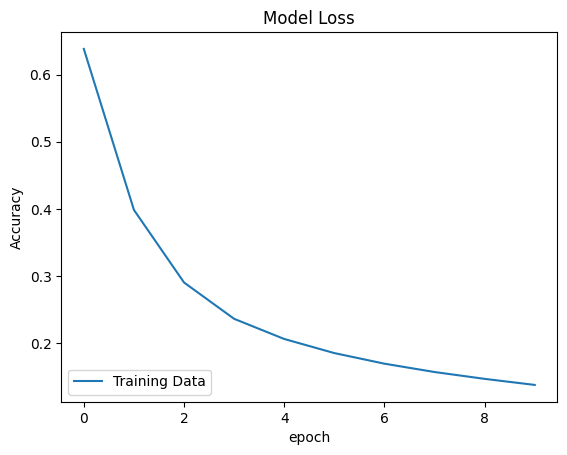

In [102]:
plt.plot(history.history["loss"])

plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower left")

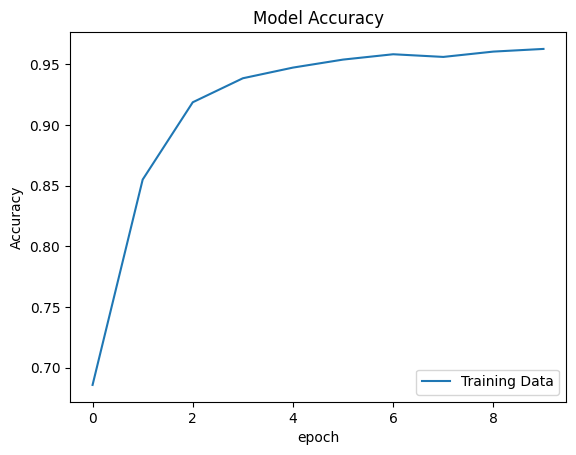

In [103]:
plt.plot(history.history["accuracy"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower right")

## Model2

In [197]:
# Creating the model
model2 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(30,)),
            tf.keras.layers.Dense(units=50, activation = "relu"),
            tf.keras.layers.Dense(units=1, activation = "sigmoid")
])
# compile the model
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.005),
    metrics =["accuracy"]
)
# Fit the model
history2= model2.fit(X_train_norm, y_train, epochs=30)

Epoch 1/30

15/15 [==============================] - 1s 5ms/step - loss: 0.3389 - accuracy: 0.8505

Epoch 2/30

15/15 [==============================] - 0s 5ms/step - loss: 0.1219 - accuracy: 0.9626

Epoch 3/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0839 - accuracy: 0.9824

Epoch 4/30

15/15 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9846

Epoch 5/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9868

Epoch 6/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9868

Epoch 7/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9890

Epoch 8/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9890

Epoch 9/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9912

Epoch 10/30

15/15 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9934


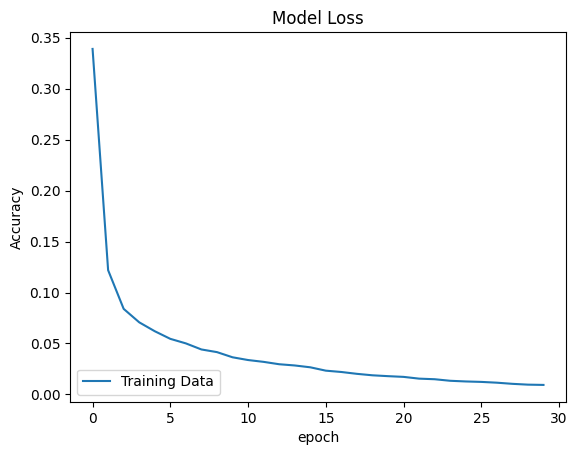

In [198]:
plt.plot(history2.history["loss"])

plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower left")

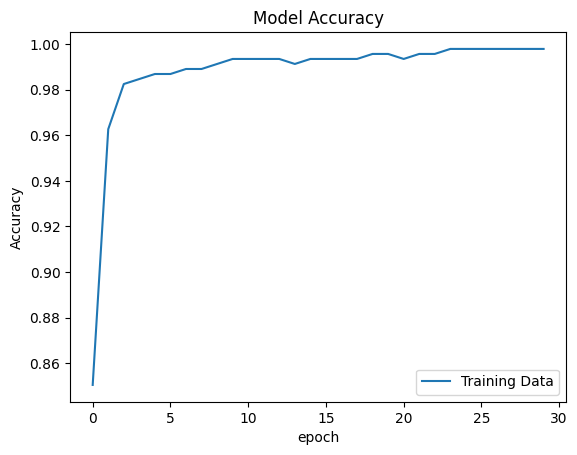

In [199]:
plt.plot(history2.history["accuracy"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower right")

In [200]:
model2.evaluate(X_test_norm, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9561


[0.11895553767681122, 0.9561403393745422]

## Model3

In [213]:
# Creating the model
model3 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(30,)),
            tf.keras.layers.Dense(units=50, activation = "relu" , kernel_regularizer=tf.keras.regularizers.L2(0.02)),
            tf.keras.layers.Dense(units=1, activation = "sigmoid")
])
# compile the model
model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics =["accuracy"]
)
# Fit the model
history3= model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=40)

Epoch 1/40

15/15 [==============================] - 2s 32ms/step - loss: 1.2653 - accuracy: 0.7780 - val_loss: 1.1037 - val_accuracy: 0.9474

Epoch 2/40

15/15 [==============================] - 0s 13ms/step - loss: 1.0205 - accuracy: 0.9231 - val_loss: 0.9399 - val_accuracy: 0.9649

Epoch 3/40

15/15 [==============================] - 0s 13ms/step - loss: 0.8897 - accuracy: 0.9407 - val_loss: 0.8356 - val_accuracy: 0.9737

Epoch 4/40

15/15 [==============================] - 0s 12ms/step - loss: 0.7957 - accuracy: 0.9473 - val_loss: 0.7543 - val_accuracy: 0.9737

Epoch 5/40

15/15 [==============================] - 0s 15ms/step - loss: 0.7194 - accuracy: 0.9516 - val_loss: 0.6836 - val_accuracy: 0.9737

Epoch 6/40

15/15 [==============================] - 0s 14ms/step - loss: 0.6521 - accuracy: 0.9582 - val_loss: 0.6224 - val_accuracy: 0.9649

Epoch 7/40

15/15 [==============================] - 0s 16ms/step - loss: 0.5933 - accuracy: 0.9604 - val_loss: 0.5688 - val_accuracy: 0.9561


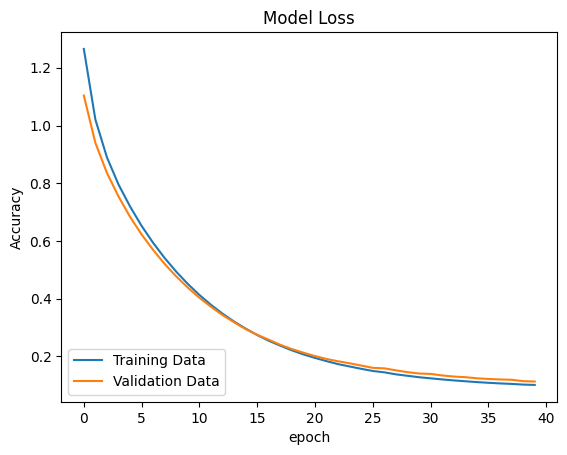

In [214]:
plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower left")

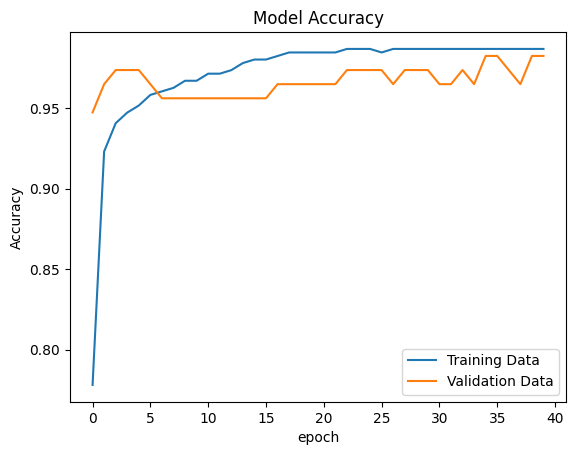

In [215]:
plt.plot(history3.history["accuracy"])
plt.plot(history3.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")

plt.legend(["Training Data" ,"Validation Data"], loc="lower right")

In [216]:
model3.evaluate(X_test_norm, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 0.9825


[0.11326328665018082, 0.9824561476707458]

#  Predicting on the best model

In [217]:
model3.evaluate(X_test_norm, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1133 - accuracy: 0.9825


[0.11326328665018082, 0.9824561476707458]

In [218]:
X_test_norm.shape

(114, 30)

In [219]:
X_test_norm[0]

array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
       -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
        0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
        0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
       -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
       -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ])

In [220]:
Y_pred = model3.predict(X_test_norm)

4/4 [==============================] - 0s 5ms/step


In [222]:
Y_pred.shape

(114, 1)

In [230]:
Y_pred

array([[7.6751873e-02],
       [4.0882784e-01],
       [2.9295776e-03],
       [9.9999541e-01],
       [2.5366166e-01],
       [9.9945962e-01],
       [3.9137267e-02],
       [3.9536380e-03],
       [1.2477420e-02],
       [1.5032247e-02],
       [7.4182194e-01],
       [4.3629032e-02],
       [5.4652739e-02],
       [6.7018859e-02],
       [8.4055737e-03],
       [9.8430729e-01],
       [7.0097642e-03],
       [3.5727201e-03],
       [7.5712376e-03],
       [9.9837375e-01],
       [9.6465591e-03],
       [3.5615829e-03],
       [1.0118995e-02],
       [4.1945209e-03],
       [4.3222133e-02],
       [9.9482620e-01],
       [2.2786109e-02],
       [7.1670391e-02],
       [9.9220693e-01],
       [9.9552560e-01],
       [4.4160903e-02],
       [1.5725732e-02],
       [5.9548449e-03],
       [9.9998182e-01],
       [9.9872184e-01],
       [1.3352196e-02],
       [4.3922630e-03],
       [1.0110288e-01],
       [3.2179903e-03],
       [9.9459365e-03],
       [9.9998307e-01],
       [9.326413

## Convert the probabilities value to Binary value (0, 1)

When Y_pred value is bigger than **0.5** class will be **1** , and when is lower class will be **0**.

In [231]:
threshold = 0.5
Y_pred_binary = np.where(Y_pred > threshold, 1, 0)

Y_pred_binary

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    